#### Preventing Firearm Crimes
##### By: Andres Davila (6292764), Joseph Gooding (6349014) and Nicholas Lopez-Calleja (5907573)
##### ECO 4421: Introduction to Econometrics
##### Department of Economics, Florida International University
##### Dr. Alfonso Rodriguez
##### 04/06/2023


In [24]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt 
import matplotlib.ticker as mtick
import matplotlib.patches as mpatches

##### The next 3 cells are the code for taking raw data from the Crime Data Explorer and working it into a single CSV

___

___

In [4]:
#importing final CSV
df1 = pd.read_csv('NIBRS_FINAL_NaN.csv')
#dropping all rows with NaNs
df1.dropna(axis=0,inplace=True)
#resetting the index
df1.reset_index(drop=True, inplace=True)

In [5]:
#running a logit regression
logit = smf.logit('firearm ~ off_age + off_female + off_black + off_asian + off_other + vic_age + vic_female + vic_black + vic_asian+ vic_other + violent + relationship  + gop + grade + grade_gop', data=df1).fit()
print(logit.summary2())

Optimization terminated successfully.
         Current function value: 0.181831
         Iterations 10
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.456      
Dependent Variable: firearm          AIC:              958942.8928
Date:               2023-04-06 02:42 BIC:              959147.4542
No. Observations:   2636820          Log-Likelihood:   -4.7946e+05
Df Model:           15               LL-Null:          -8.8210e+05
Df Residuals:       2636804          LLR p-value:      0.0000     
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     10.0000                                       
------------------------------------------------------------------
                  Coef.  Std.Err.     z     P>|z|   [0.025  0.975]
------------------------------------------------------------------
Intercept        -5.1021   0.0170 -299.9437 0.0000 -5.1355 -5.0688
off_age          -0.0173   0.0002  -80.1228 0.0000 -

In [6]:
# getting marginal effects of logit model
mfx = logit.get_margeff(at='overall', method='dydx')
print(mfx.summary())

        Logit Marginal Effects       
Dep. Variable:                firearm
Method:                          dydx
At:                           overall
                  dy/dx    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
off_age         -0.0010   1.27e-05    -81.166      0.000      -0.001      -0.001
off_female      -0.0429      0.000   -108.267      0.000      -0.044      -0.042
off_black        0.0332      0.000     90.602      0.000       0.032       0.034
off_asian       -0.0090      0.002     -4.809      0.000      -0.013      -0.005
off_other       -0.0282      0.001    -19.134      0.000      -0.031      -0.025
vic_age      -6.904e-06   1.06e-05     -0.651      0.515   -2.77e-05    1.39e-05
vic_female      -0.0350      0.000   -117.711      0.000      -0.036      -0.034
vic_black        0.0264      0.000     70.060      0.000       0.026       0.027
vic_asian        0.0131      0.001    

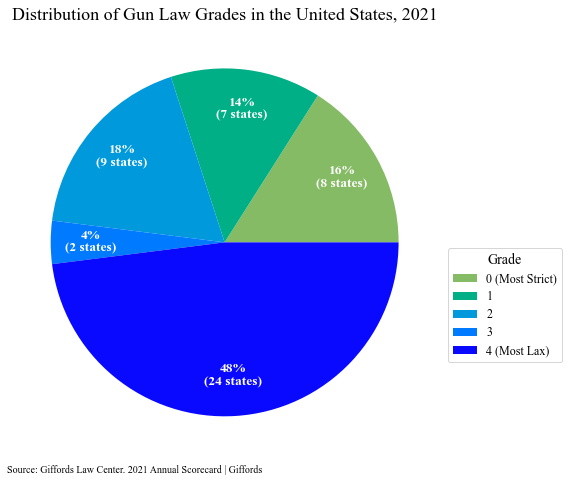

In [7]:
grade_counts = df1.groupby(['grade', 'state'])['state'].count().unstack('grade')

num_states = (grade_counts.notnull().sum())

color =['#85bb65', '#00af86', '#009adc', '#007aff', '#0909ff']

plt.rcParams["font.family"]= "Times New Roman"
plt.rcParams["figure.facecolor"] ='w'

plt.figure(figsize=(8,8))
plt.pie(num_states, colors=color,
        autopct=lambda x: f'{x:.0f}%\n({(x/100)*sum(num_states):.0f} states)', startangle=0, textprops={'size':13.5, 'fontname':'Times New Roman', 'color': 'w', 'fontweight':555}, pctdistance=.77,
         rotatelabels=True )

plt.annotate('Source: Giffords Law Center. 2021 Annual Scorecard | Giffords', (0,0), (-0,-5), fontsize=10, 
             xycoords='axes fraction', textcoords='offset points', va='top')

plt.title("Distribution of Gun Law Grades in the United States, 2021", fontsize=18)

plt.legend(labels =['0 (Most Strict)', '1', '2', '3', '4 (Most Lax)'], loc='best', bbox_to_anchor=(1, .5), fontsize=12, title='Grade', title_fontsize=14)
plt.show()

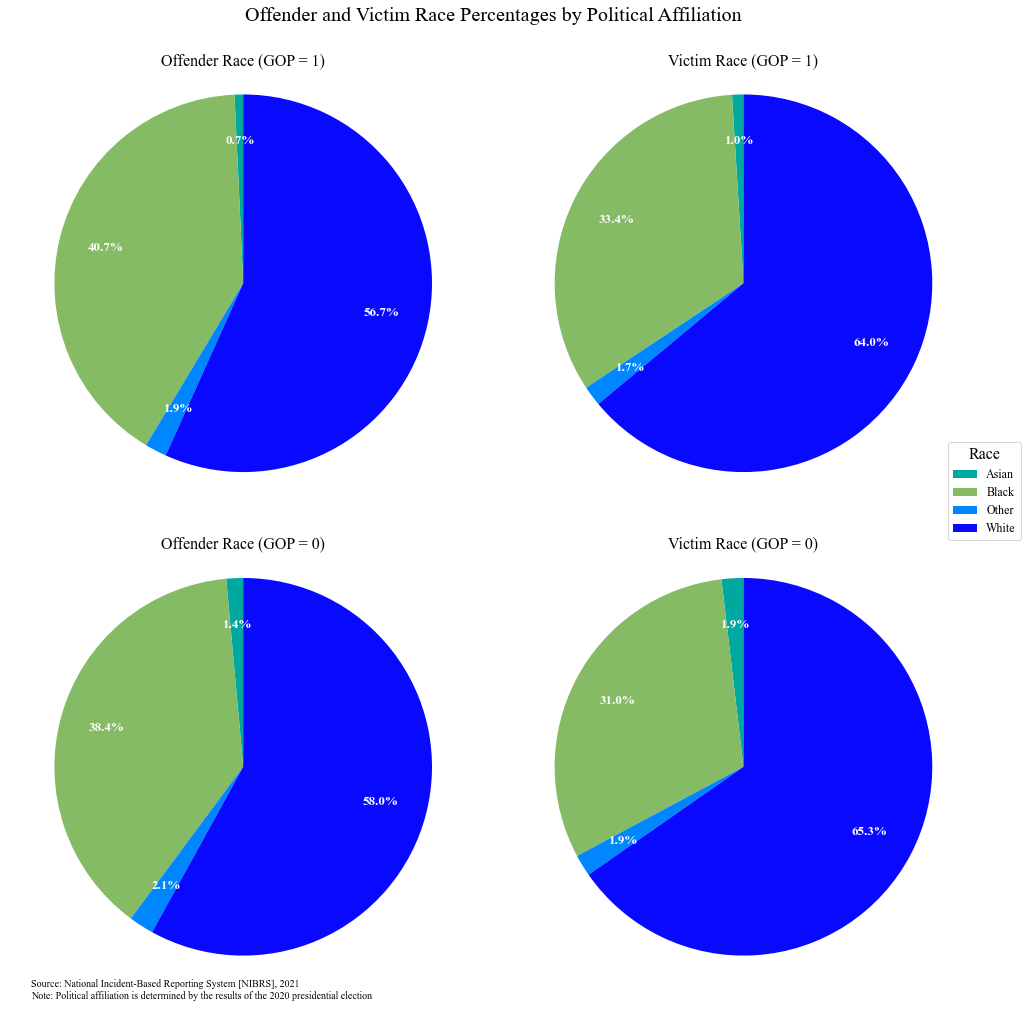

In [8]:
df2 = df1

df2['off_white'] = 1 - (df2['off_black'] + df2['off_asian'] + df2['off_other'])
df2['vic_white'] = 1 - (df2['vic_black'] + df2['vic_asian'] + df2['vic_other'])


df_gop1 = df2[df2['gop'] == 1]
df_gop0 = df2[df2['gop'] == 0]


race_off_gop1 = df_gop1[['off_asian', 'off_black', 'off_other', 'off_white']].mean()
race_vic_gop1 = df_gop1[['vic_asian', 'vic_black', 'vic_other', 'vic_white']].mean()
race_off_gop0 = df_gop0[['off_asian', 'off_black', 'off_other', 'off_white']].mean()
race_vic_gop0 = df_gop0[['vic_asian', 'vic_black', 'vic_other', 'vic_white']].mean()


plt.rcParams['figure.figsize'] = [14, 14]
plt.rcParams["figure.facecolor"] ='w'

color_palette= ['#00a9a0', '#85bb65', '#0087ff', '#0909ff']

fig, axs = plt.subplots(2, 2)
fig.suptitle("Offender and Victim Race Percentages by Political Affiliation", fontsize=20, y=1)
axs[0, 0].pie(race_off_gop1, colors=color_palette, autopct='%1.1f%%', textprops={'fontsize':13, 'c':'w', 'fontweight':555}, pctdistance=.75, startangle=90, rotatelabels=True)
axs[0, 0].set_title("Offender Race (GOP = 1)", fontsize=16, y=.95)
axs[0, 1].pie(race_vic_gop1, colors=color_palette, autopct='%1.1f%%', textprops={'fontsize':13, 'c':'w', 'fontweight':555}, pctdistance=.75, startangle=90)
axs[0, 1].set_title("Victim Race (GOP = 1)", fontsize=16, y=.95)
axs[1, 0].pie(race_off_gop0, colors=color_palette,  autopct='%1.1f%%', textprops={'fontsize':13, 'c':'w', 'fontweight':555}, pctdistance=.75, startangle=90)
axs[1, 0].set_title("Offender Race (GOP = 0)", fontsize=16, y=.95)
axs[1, 1].pie(race_vic_gop0, colors=color_palette, autopct='%1.1f%%', textprops={'fontsize':13, 'c':'w', 'fontweight':555}, pctdistance=.75, startangle=90, rotatelabels=True)
axs[1, 1].set_title("Victim Race (GOP = 0)", fontsize=16, y=.95)

axs[1,0].annotate('Note: Political affiliation is determined by the results of the 2020 presidential election', (.05,.025), (0,0), fontsize=10, 
             xycoords='axes fraction', textcoords='offset points', va='top')

axs[1,0].annotate('Source: National Incident-Based Reporting System [NIBRS], 2021 ', (.05,.05), (0,0), fontsize=10, 
             xycoords='axes fraction', textcoords='offset points', va='top')

plt.tight_layout()
plt.legend(loc=0, title= 'Race', bbox_to_anchor=(1.1, 1.2), fontsize=12, labels=['Asian', 'Black', 'Other', 'White'], title_fontsize=16)
plt.show()

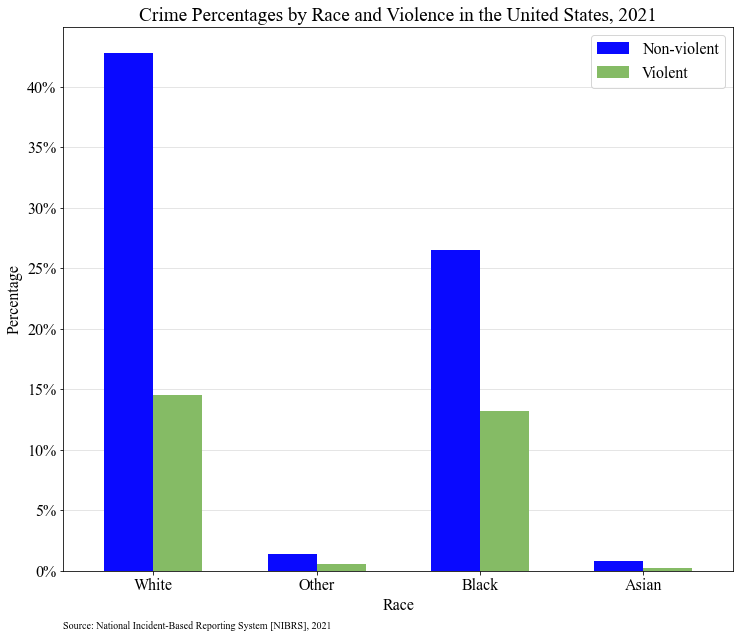

In [9]:
total_crimes = len(df2)

crime_counts = df2.groupby(['off_asian', 'off_black', 'off_other', 'off_white', 'violent']).size().unstack(fill_value=0)

crime_pct = crime_counts.apply(lambda x: x / total_crimes * 100, axis=1)

plt.rcParams['figure.figsize'] = [12, 10]
plt.rcParams['font.size'] = 16
plt.rcParams["figure.facecolor"] ='w'

ax = crime_pct.plot(kind='bar', color=['#0909ff', '#85bb65'], width=.6)
plt.title('Crime Percentages by Race and Violence in the United States, 2021')
plt.xlabel('Race')
plt.xticks(range(4), ['White', 'Other', 'Black', 'Asian'], rotation=0)
plt.ylabel('Percentage')
plt.legend(['Non-violent', 'Violent'])

plt.annotate('Source: National Incident-Based Reporting System [NIBRS], 2021', (0,0), (-0,-50), fontsize=10, 
             xycoords='axes fraction', textcoords='offset points', va='top')

ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=100, decimals=0))

ax.set_axisbelow(True)
plt.grid(axis='y', alpha=.4 )
plt.show()

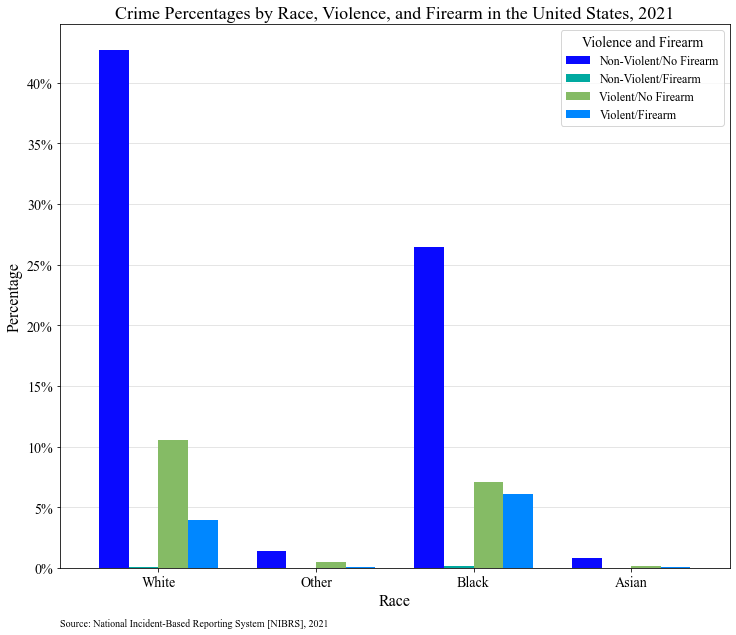

In [10]:
df2['violent_firearm'] = ((df2['violent'] == 1) & (df2['firearm'] == 1)).astype(int)
df2['violent_no_firearm'] = ((df2['violent'] == 1) & (df2['firearm'] == 0)).astype(int)
df2['non_violent_firearm'] = ((df2['violent'] == 0) & (df2['firearm'] == 1)).astype(int)
df2['non_violent_no_firearm'] = ((df2['violent'] == 0) & (df2['firearm'] == 0)).astype(int)

total_crimes = len(df2)


crime_counts = df2.groupby(['off_asian', 'off_black', 'off_other', 'off_white'])[['non_violent_no_firearm', 'non_violent_firearm', 'violent_no_firearm', 'violent_firearm']].sum()

crime_pct = crime_counts.apply(lambda x: x / total_crimes * 100, axis=1)

plt.rcParams['figure.figsize'] = [12, 10]
plt.rcParams['font.size'] = 14
plt.rcParams["figure.facecolor"] ='w'



ax = crime_pct.plot(kind='bar', color=['#0909ff', '#00a9a0', '#85bb65', '#0087ff'], width=.75)
plt.title('Crime Percentages by Race, Violence, and Firearm in the United States, 2021', fontsize=18)
plt.xlabel('Race', fontsize=16)
plt.xticks(range(4), ['White', 'Other', 'Black', 'Asian'], rotation=0, fontsize=14)
plt.ylabel('Percentage', fontsize=16)
plt.legend(['Non-Violent/No Firearm', 'Non-Violent/Firearm', 'Violent/No Firearm', 'Violent/Firearm'], title='Violence and Firearm', fontsize=12, title_fontsize=14)

plt.annotate('Source: National Incident-Based Reporting System [NIBRS], 2021', (0,0), (-0,-50), fontsize=10, 
             xycoords='axes fraction', textcoords='offset points', va='top')

ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=100, decimals=0))

ax.set_axisbelow(True)
plt.grid(axis='y', alpha=.4)
plt.show()

In [11]:
x = df1.groupby(['state', 'grade', 'gop']) [['violent_firearm', 'violent_no_firearm']].sum()
x.reset_index(inplace=True)
pop = pd.read_csv('pop_2021.csv')
x = x.merge(pop, on='state')
x['violent_firearm_per_100k'] = (x['violent_firearm'] / x['2021_pop'])*100000
df3 = x.sort_values(by=['violent_firearm_per_100k'])
df3.reset_index(drop=True, inplace=True)
df3['state'] = df3['state'].replace('FL', 'FL¹')
df3['state'] = df3['state'].replace('CA', 'CA²')
df3['state'] = df3['state'].replace('NY', 'NY³')
df3['state'] = df3['state'].replace('PA', 'PA⁴')

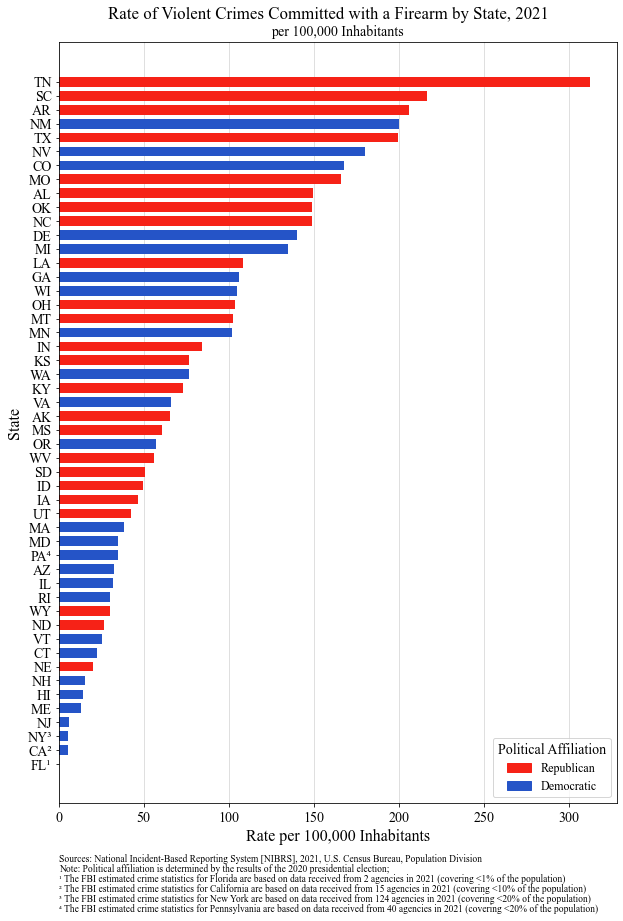

In [12]:
fig, ax = plt.subplots(figsize=(10,14), facecolor='w')

pol_color = [{p==1: '#F62217', p==0: '#2554C7'}[True] for p in df3['gop']]
red_patch = mpatches.Patch(color='#F62217', label='Republican')
blue_patch = mpatches.Patch(color='#2554C7', label= 'Democratic')

ax.barh(y=df3['state'], width=df3['violent_firearm_per_100k'], color=pol_color, height=.7)

#ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))

plt.ylabel('State', fontsize=16)
plt.xlabel('Rate per 100,000 Inhabitants', fontsize=16)

ax.set_axisbelow(True)
plt.grid(axis='x', alpha=.4, lw=1)
plt.annotate('Sources: National Incident-Based Reporting System [NIBRS], 2021, U.S. Census Bureau, Population Division', (0,0), (-0,-50), fontsize=9.5, 
             xycoords='axes fraction', textcoords='offset points', va='top')

plt.annotate('Note: Political affiliation is determined by the results of the 2020 presidential election;', (0,0), (-0,-60), fontsize=9.5, 
             xycoords='axes fraction', textcoords='offset points', va='top')

plt.annotate('¹ The FBI estimated crime statistics for Florida are based on data received from 2 agencies in 2021 (covering <1% of the population)', (0,0), (-0,-70), fontsize=9.5, 
             xycoords='axes fraction', textcoords='offset points', va='top')

plt.annotate('² The FBI estimated crime statistics for California are based on data received from 15 agencies in 2021 (covering <10% of the population)', (0,0), (-0,-80), fontsize=9.5, 
             xycoords='axes fraction', textcoords='offset points', va='top')

plt.annotate('³ The FBI estimated crime statistics for New York are based on data received from 124 agencies in 2021 (covering <20% of the population)', (0,0), (-0,-90), fontsize=9.5, 
             xycoords='axes fraction', textcoords='offset points', va='top')

plt.annotate('⁴ The FBI estimated crime statistics for Pennsylvania are based on data received from 40 agencies in 2021 (covering <20% of the population)', (0,0), (0,-100), fontsize=9.5, 
             xycoords='axes fraction', textcoords='offset points', va='top')

plt.legend(title='Political Affiliation', handles=[red_patch, blue_patch], fontsize=12)

plt.suptitle('Rate of Violent Crimes Committed with a Firearm by State, 2021', y=.915)
plt.title('per 100,000 Inhabitants', fontsize=14)

plt.show()

In [14]:
df1['firearm_prob'] = logit.predict()

In [15]:
w = df1['firearm_prob'].loc[(df1['off_black']==0) & (df1['off_asian']==0) & (df1['off_other']==0) & (df1['grade']==0) & (df1['violent']==1) & (df1['gop']==0)].describe().round(3)
b =  df1['firearm_prob'].loc[(df1['off_black']==1) & (df1['off_asian']==0) & (df1['off_other']==0) & (df1['grade']==0) & (df1['violent']==1) & (df1['gop']==0)].describe().round(3)
a = df1['firearm_prob'].loc[(df1['off_black']==0) & (df1['off_asian']==1) & (df1['off_other']==0) & (df1['grade']==0) & (df1['violent']==1) & (df1['gop']==0)].describe().round(3)
o = df1['firearm_prob'].loc[(df1['off_black']==0) & (df1['off_asian']==0) & (df1['off_other']==1) & (df1['grade']==0) & (df1['violent']==1) & (df1['gop']==0)].describe().round(3)

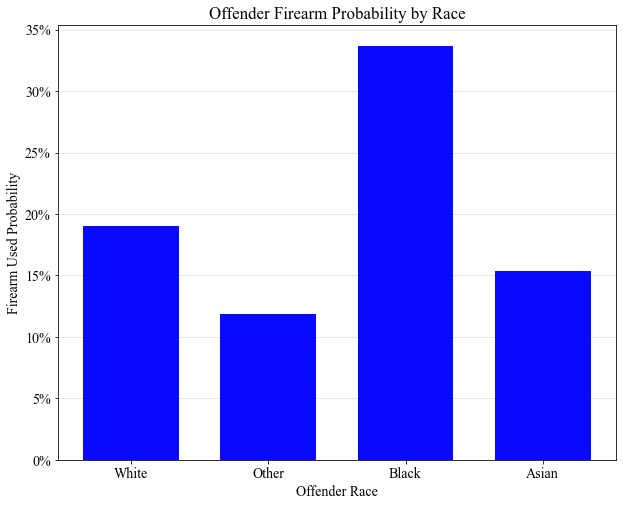

In [16]:
fig, ax = plt.subplots(figsize=(10,8), facecolor='w')

race_probs = [w['mean'], o['mean'], b['mean'], a['mean']]

race_labels = ['White', 'Other', 'Black', 'Asian']

plt.bar(race_labels, race_probs, color=['#0909ff'], width=.70)

plt.title('Offender Firearm Probability by Race')
plt.xlabel('Offender Race')
plt.ylabel('Firearm Used Probability')

ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=0))

ax.set_axisbelow(True)
plt.grid(axis='y', alpha=.4)
plt.show()

In [17]:
vw = df1['firearm_prob'].loc[(df1['vic_black']==0) & (df1['vic_asian']==0) & (df1['vic_other']==0) & (df1['grade']==0) & (df1['violent']==1) & (df1['gop']==0)].describe().round(3)
vb = df1['firearm_prob'].loc[(df1['vic_black']==1) & (df1['vic_asian']==0) & (df1['vic_other']==0) & (df1['grade']==0) & (df1['violent']==1) & (df1['gop']==0)].describe().round(3)
va= df1['firearm_prob'].loc[(df1['vic_black']==0) & (df1['vic_asian']==1) & (df1['vic_other']==0) & (df1['grade']==0) & (df1['violent']==1) & (df1['gop']==0)].describe().round(3)
vo = df1['firearm_prob'].loc[(df1['vic_black']==0) & (df1['vic_asian']==0) & (df1['vic_other']==0) & (df1['grade']==0) & (df1['violent']==1) & (df1['gop']==0)].describe().round(3)

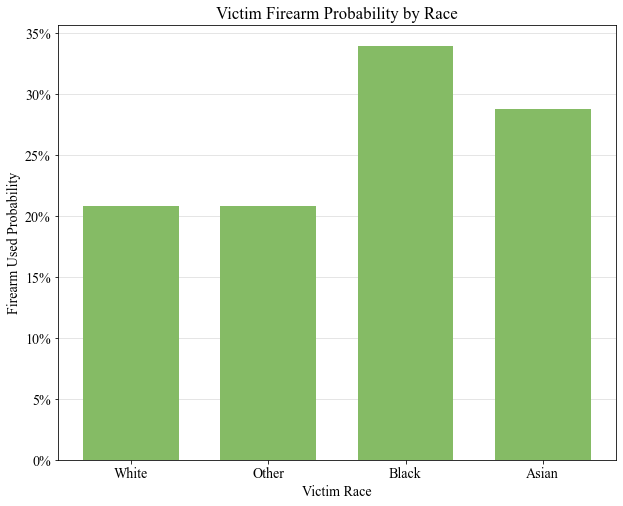

In [18]:
fig, ax = plt.subplots(figsize=(10,8), facecolor='w')

race_probs_v = [vw['mean'], vo['mean'], vb['mean'], va['mean']]

race_labels = ['White', 'Other', 'Black', 'Asian']

plt.bar(race_labels, race_probs_v, color=['#85bb65'], width=.70)

plt.title('Victim Firearm Probability by Race')
plt.xlabel('Victim Race')
plt.ylabel('Firearm Used Probability')

ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=0))

ax.set_axisbelow(True)
plt.grid(axis='y', alpha=.4)
plt.show()

In [20]:
print ('violent = 1 , gop = 1, off_black =1 and vic_black =1')
print(df1['firearm_prob'].loc[(df1['violent']==1) & (df1['gop']==1) & (df1['off_black']==1) & (df1['vic_black']==1)].groupby(df1['grade']).agg(['count', 'mean', 'std', 'min', 'max']))

violent = 1 , gop = 1, off_black =1 and vic_black =1
        count      mean       std       min       max
grade                                                
2       16510  0.516330  0.156834  0.142650  0.813378
3       17100  0.511593  0.147501  0.135526  0.846119
4      107969  0.520968  0.138803  0.115843  0.856627


In [21]:
print ('violent = 1 , gop = 1')
print(df1['firearm_prob'].loc[(df1['violent']==1) & (df1['gop']==1) ].groupby(df1['grade']).agg(['count', 'mean', 'std', 'min', 'max']))

violent = 1 , gop = 1
        count      mean       std       min       max
grade                                                
2       37297  0.420572  0.178620  0.039605  0.813378
3       46124  0.411070  0.170201  0.052600  0.846119
4      352998  0.397599  0.164017  0.045919  0.856627


In [23]:
print ('violent = 1 , gop = 0, off_black =1 and vic_black =1')
print(df1['firearm_prob'].loc[(df1['violent']==1) & (df1['gop']==0) & (df1['off_black']==1) & (df1['vic_black']==1)].groupby(df1['grade']).agg(['count', 'mean', 'std', 'min', 'max']))

violent = 1 , gop = 0, off_black =1 and vic_black =1
       count      mean       std       min       max
grade                                               
0      17383  0.355890  0.146161  0.063169  0.710303
1      19699  0.382180  0.143072  0.063490  0.755144
2      34214  0.428368  0.143652  0.104294  0.795273
4      15280  0.547418  0.145204  0.148967  0.856213


In [25]:
print ('violent = 1 , gop = 0')
print(df1['firearm_prob'].loc[(df1['violent']==1) & (df1['gop']==0)].groupby(df1['grade']).agg(['count', 'mean', 'std', 'min', 'max']))

violent = 1 , gop = 0
        count      mean       std       min       max
grade                                                
0       72514  0.251577  0.141932  0.019392  0.710303
1       97353  0.263095  0.139341  0.027607  0.755144
2      106010  0.320918  0.155269  0.030910  0.795273
4       38407  0.421549  0.178354  0.038146  0.856213
